In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv("Advertising.csv", index_col=0)
data_df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


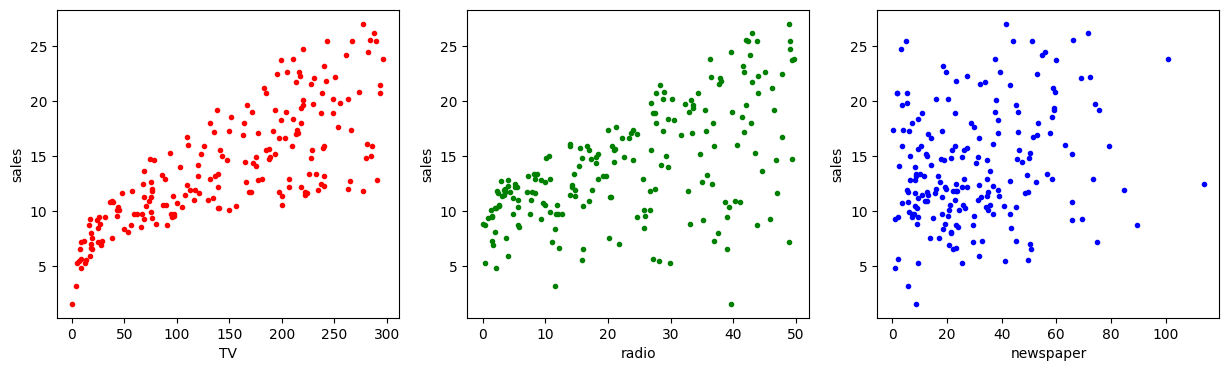

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

The first plot shows a sharp upward trend in the number of units sold as TV advertising increases. A similar trend is also found as radio advertising increases. However, in the last plot, there does not appear to be a relationship between newspaper advertising and the number of units sold.

---

$$
\hat{\beta}_1 =
\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

From the samples provided, first we find $\beta_1$ from the first expression and substitute the value of $\beta_1$ in the second expression for $\beta_0$.


In [4]:
X = data_df.TV.to_numpy()
Y = data_df.sales.to_numpy()

In [5]:
x_mean = X.mean()
y_mean = Y.mean()

beta_1 =  np.sum((X - x_mean) * (Y - y_mean)) / np.sum(np.power((X - x_mean),2))

In [6]:
beta_0 =  y_mean - (beta_1 * x_mean)

In [7]:
print(f" y = {beta_0:.3f} + {beta_1:.3f} x")

 y = 7.033 + 0.048 x


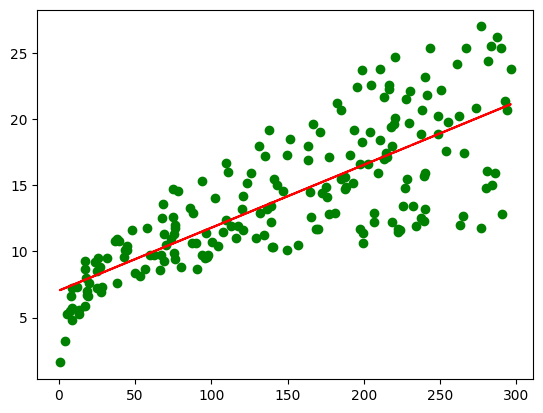

In [8]:
plt.scatter(X,Y, color = "green")
plt.plot(X, beta_0+(beta_1 * X), color="red")

In [9]:
Y_cap = beta_0+(beta_1 * X)

In [10]:
SSE = np.sum(( Y - Y_cap ) ** 2)
print(SSE)

2102.5305831313512


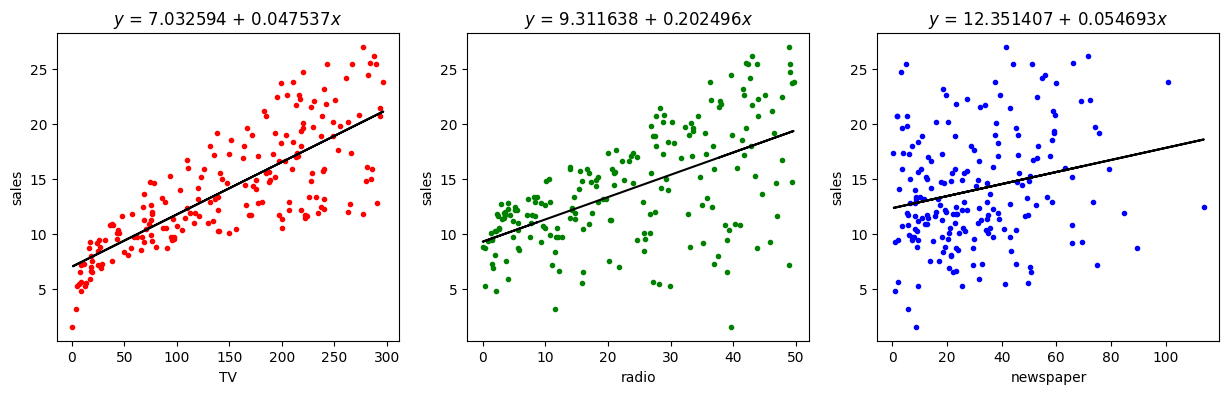

In [11]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

def train_plot(data_df, feature, ax,c):
    X = data_df[feature].to_numpy()
    Y = data_df['sales'].to_numpy()
    
    x_mean = X.mean()
    y_mean = Y.mean()
    
    beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum(np.power((X-x_mean), 2))
    
    beta_0 = y_mean - (beta_1 * x_mean)

    y_hat = beta_0 + np.dot(X, beta_1)
    
    ##Plot the regression line
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title(("$y$ = %2f + %2f$x$" %(beta_0, beta_1)))

    
# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

## Sklearn Implementation

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linear_reg = LinearRegression()

linear_reg.fit(X.reshape(-1,1), Y.reshape(-1,1))

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
linear_reg.coef_

array([[0.04753664]])

In [15]:
linear_reg.intercept_

array([7.03259355])

In [16]:
Y_cap = linear_reg.predict(X.reshape(-1,1))

In [17]:
SSE = np.sum(( Y - Y_cap.flatten() ) ** 2)
print(SSE)

2102.5305831313512
